### Binning:

- Binning, also called discretization, is a technique for reducing the cardinality of continuous and discrete data.
- Binning groups related values together in bins to reduce the number of distinct values.
- Bin continuous data into intervals.

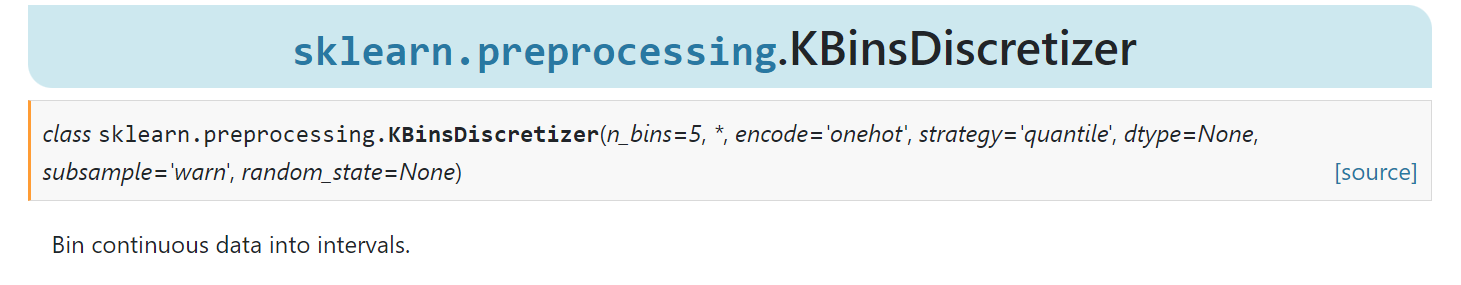

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [11]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6433566433566433

In [14]:
# Cross validation
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6358372456964005

## Binning:

### Quantile Binning

In [15]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [28]:
trf = ColumnTransformer([
    ("Age",kbin_age,[0]),
    ('Fare',kbin_fare,[1])
])

In [29]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [30]:
trf.named_transformers_

{'Age': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'Fare': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [32]:
# Can get bins
trf.named_transformers_["Fare"].n_bins_

array([10])

In [34]:
# Can get bin edges
trf.named_transformers_['Age'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [36]:
trf.named_transformers_['Fare'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [24]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [55]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['Age'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['Fare'].bin_edges_[0].tolist())

In [56]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
452,30.0,5.0,27.7500,6.0,"(28.5, 32.0]","(26.0, 29.125]"
365,30.0,5.0,7.2500,0.0,"(28.5, 32.0]","(0.0, 7.75]"
742,21.0,2.0,262.3750,9.0,"(19.0, 22.0]","(82.171, 512.329]"
385,18.0,1.0,73.5000,8.0,"(14.0, 19.0]","(51.479, 82.171]"
532,17.0,1.0,7.2292,0.0,"(14.0, 19.0]","(0.0, 7.75]"


In [57]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [58]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [59]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6358763693270735

In [60]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6345266040688575


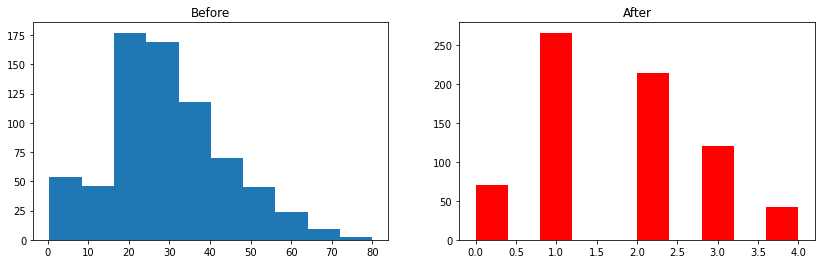

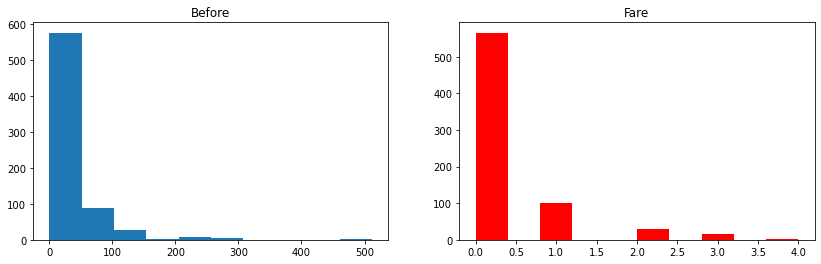

In [61]:
discretize(5,'kmeans')